# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [5]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
#B= 
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -3.38433605e-16]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------


NameError: name 'B' is not defined

In [87]:
import numpy as np
from numpy import array # importar el método array
from numpy.linalg import eig #esta función trae el método eig el cual tiene como resultado 2 valores: eigenvalues y los eigenvectores, eig (descomposición)
from numpy.linalg import inv

#Matriz 1
def reconstruir(X):
  valores, vectores = np.linalg.eig(X)
  W = vectores
  Winv = np.linalg.inv(W)
  D = np.diag(valores)
  Bh = np.matmul(W,D)
  B= np.matmul(Bh,Winv)

  # Para poder comparar más fácil la calidad de la reconstrución
  # retamos la matriz orignal de la reconstruida y sumamos todos los
  # elementos. En una perfecta reconstruccion el valor de la suma es 0
  resta = np.subtract(B,X)
  res = np.sum(resta)

  print("*Matriz original")
  print(X)
  print("*****************")

  print("*Matriz reconstruida")
  print(B.round(0))
  print("*****************")

  print("*Residuo Numérico")
  print(res)
  print("*****************")


  return(B,res)


A = np.array([[3,0,2],[3,0,-2],[0,1,1]])

A_reconstruida, valor_residual = reconstruir(A)

*Matriz original
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
*****************
*Matriz reconstruid
[[ 3.-0.j -0.-0.j  2.-0.j]
 [ 3.+0.j  0.-0.j -2.-0.j]
 [ 0.-0.j  1.-0.j  1.+0.j]]
*****************
*Residuo Numérico
(-1.1657341758564144e-15-6.052493619104667e-17j)
*****************


In [89]:
A2 = np.array([[1,3,8],[2,0,0],[0,0,1]])
A2_reconstruida, valor_residual = reconstruir(A2)

*Matriz original
[[1 3 8]
 [2 0 0]
 [0 0 1]]
*****************
*Matriz reconstruid
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
*****************
*Residuo Numérico
2.6430817961591416e-16
*****************


In [90]:
A3 = np.array([[5,4,0],[1,0,1],[10,7,1]])
A3_reconstruida, valor_residual = reconstruir(A3)

*Matriz original
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
*****************
*Matriz reconstruid
[[ 5.  4.  0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]
*****************
*Residuo Numérico
-1.4533602858285572e-14
*****************


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


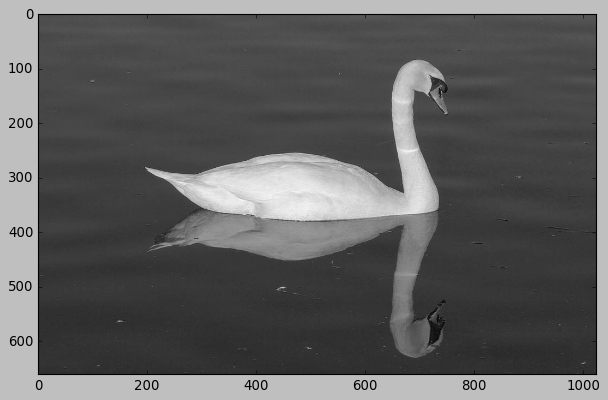

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F94D034A940>


In [21]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [22]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [23]:
U.shape

(660, 660)

In [24]:
V.shape

(1024, 1024)

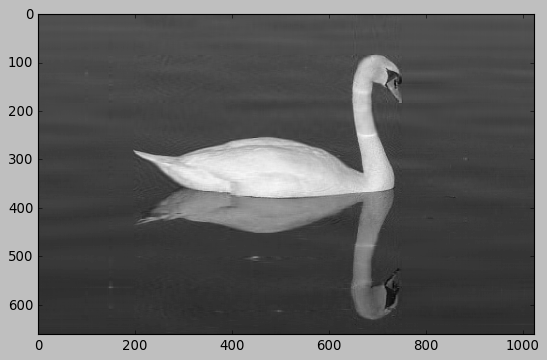

Felicidades la imagen está comprimida


In [30]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

In [66]:
def comprimir(url, compresion):
    n_jobs=-1
    #imagen 1
    plt.style.use('classic') # configura gráfico classic. Variable llamada imagen
    #la URL importa la imagen y con convert LA la deja en escala de grises
    img = Image.open(urllib.request.urlopen(url)).convert('LA')
    #img = Image.open('moto.jpg')
    imggray = img.convert('LA') #Devuelve una copia convertida de la imagen de la moto, traduce los pixeles a través de la paleta.
    #Toma la imagen de la moto y la convierte en gris. Crea la lista de datos y los convierte en arreglos
    imgmat = np.array(list(imggray.getdata(band=0)),float)

    print(imgmat)

    imgmat.shape = (imggray.size[1],imggray.size[0])

    plt.figure(figsize=(9,6))
    plt.imshow(imgmat,cmap='gray')
    plt.show()
    print(img)

    U,D,V = np.linalg.svd(imgmat)
    print("imgmat.shape")
    print(imgmat.shape)

    print("U.shape ")
    print(U.shape)

    print("V.shape ")
    print(V.shape)

    nvalue = compresion
    #------------------------------
    reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
    plt.imshow(reconstimg,cmap='gray')
    plt.show()
    print("Felicidades la imagen está comprimida")

[59. 59. 57. ... 66. 62. 60.]


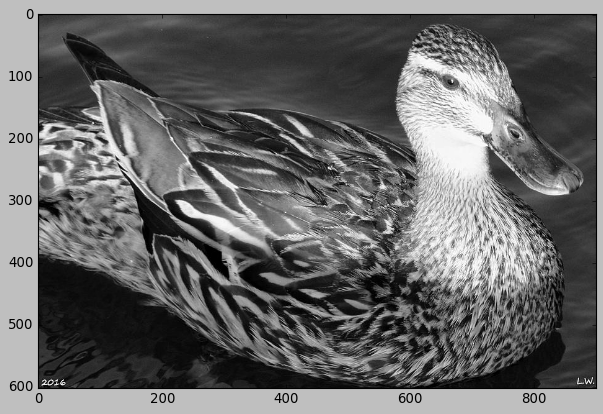

<PIL.Image.Image image mode=LA size=900x602 at 0x7F94D013AE50>
imgmat.shape
(602, 900)
U.shape 
(602, 602)
V.shape 
(900, 900)


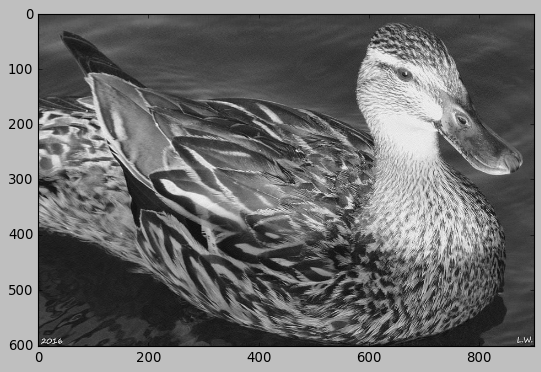

Felicidades la imagen está comprimida


In [62]:
#imagen 1
comprimir('https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/mallard-black-and-white-lisa-wooten.jpg', 300)

[ 0.  0.  0. ... 10. 10. 10.]


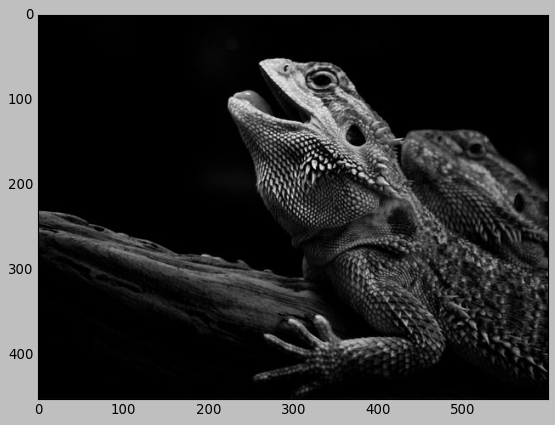

<PIL.Image.Image image mode=LA size=600x452 at 0x7F94058BBD00>
imgmat.shape
(452, 600)
U.shape 
(452, 452)
V.shape 
(600, 600)


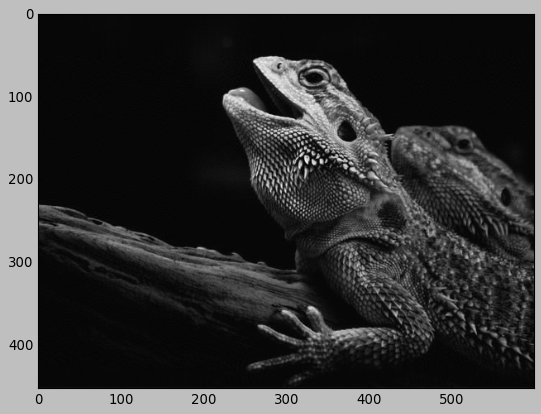

Felicidades la imagen está comprimida


In [74]:
#imagen 2
comprimir('https://assets.hongkiat.com/uploads/black-white-animal-photography/lizard.jpg',200)

[175. 175. 173. ... 198. 199. 200.]


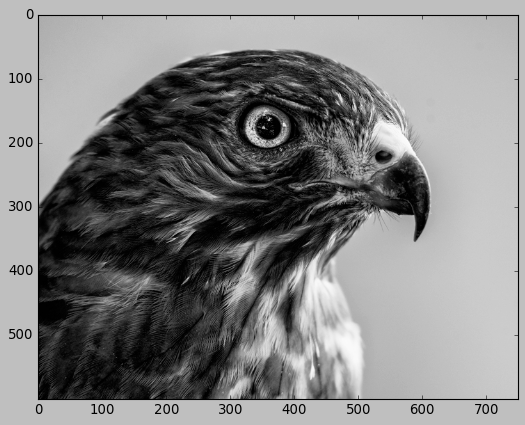

<PIL.Image.Image image mode=LA size=750x600 at 0x7F940596DFD0>
imgmat.shape
(600, 750)
U.shape 
(600, 600)
V.shape 
(750, 750)


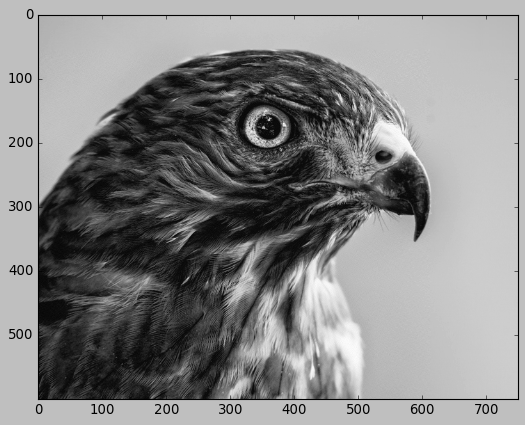

Felicidades la imagen está comprimida


In [72]:
comprimir('https://i0.wp.com/digital-photography-school.com/wp-content/uploads/2015/08/DSC_2451-Edit-2-1.jpg?fit=750%2C600&ssl=1', 300)#imagen 3

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

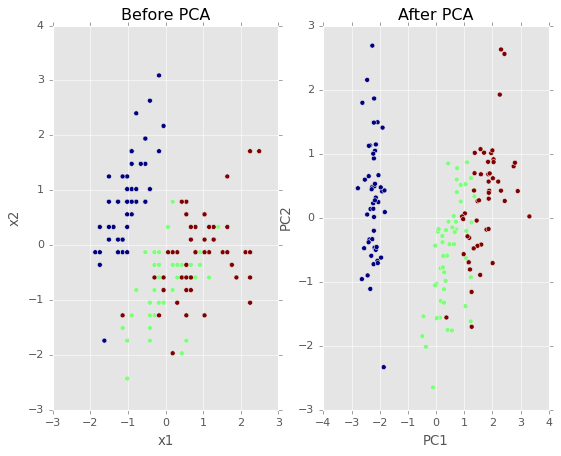

In [76]:
#Grafiquemos los datos antes y después de la transformación PCA y también codifiquemos con colores cada punto (muestra) usando la clase correspondiente de la flor (y)
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [77]:
#Podemos ver que en el espacio PCA, la varianza se maximiza a lo largo de PC1 (explica el 73 % de la varianza) y PC2 (explica el 22 % de la varianza). Juntos, explican el 95%.
print(pca.explained_variance_ratio_)
# array([0.72962445, 0.22850762])

[0.72962445 0.22850762]


In [78]:
#Prueba de que los valores propios de la matriz de covarianza original son iguales a las varianzas del espacio reducido
#La prueba de máxima varianza también se puede ver estimando la matriz de covarianza del espacio reducido
np.cov(X_new.T)
array([[2.93808505e+00, 4.83198016e-16],
       [4.83198016e-16, 9.20164904e-01]])

array([[2.93808505e+00, 4.83198016e-16],
       [4.83198016e-16, 9.20164904e-01]])

In [79]:
#Observamos que estos valores (en la diagonal tenemos las varianzas) son iguales a los valores propios reales de la covarianza almacenada en :pca.explained_variance_
pca.explained_variance_
array([2.93808505, 0.9201649])

array([2.93808505, 0.9201649 ])

In [80]:
#La trama bipartita
#El biplot es la mejor manera de visualizar todo en uno después de un análisis PCA .
#Hay una implementación en R pero no hay una implementación estándar en python, así que decidí escribir mi propia función para eso:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

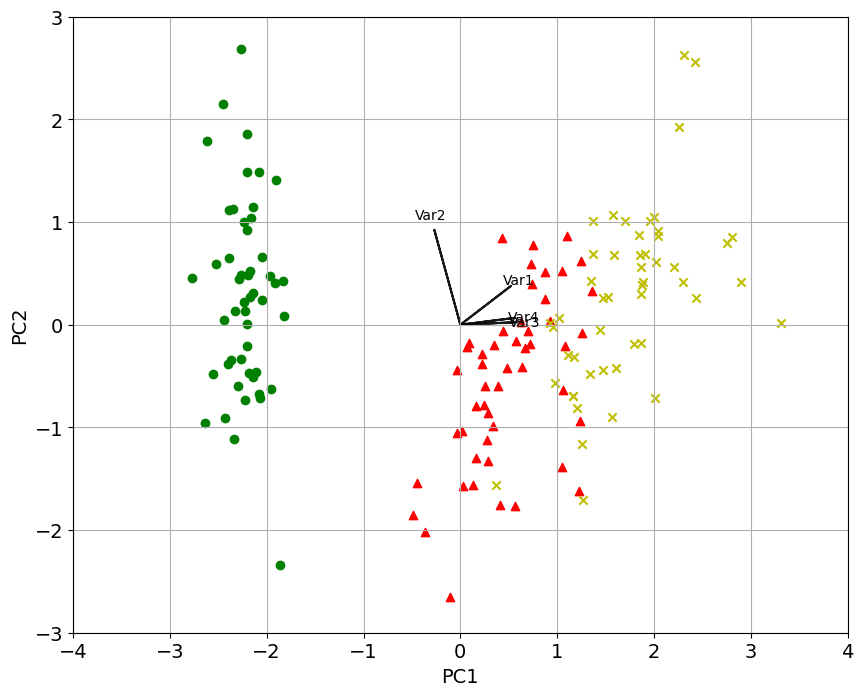

In [81]:
#Llame a la función (asegúrese de ejecutar primero los bloques iniciales de código donde cargamos los datos del iris y realizamos el análisis PCA):

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

In [82]:
#De nuevo podemos verificar visualmente que a) la varianza está maximizada yb) que las características 1, 3 y 4 son las más importantes para PC1.
#De manera similar, la característica 2 y luego la 1 son las más importantes para PC2.
#Las flechas (variables/características) que apuntan en la misma dirección indican correlación entre las variables que representan
#Las flechas que apuntan en direcciones opuestas indican un contraste entre las variables que representan.

#Para verificar se usa el código:

# Var 3 and Var 4 are extremely positively correlated
np.corrcoef(X[:,2], X[:,3])[1,0]
0.9628654314027957
# Var 2and Var 3 are negatively correlated
np.corrcoef(X[:,1], X[:,2])[1,0]
-0.42844010433054014

-0.42844010433054014

#### ¿Qué es feature importance y para que nos sirve?

El *feature importance* nos ayuda a comprender cuando contribuye cada *feature* en los eigenvectores. Cuanto más se acerca al 1 dicho *feauture* más pesa  en el componente principal.

#### ¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?
Lo más relevante fué que solo con los dos primeros Componentes conservamos más del 95% de la variabilidad de los datos para los datos usados.

#### ¿Dónde lo aplicarías o te sería de utilidad este conocimiento?
PCA se puede utilizar para entender mejor que features abonan más en la variabilidad de nuestro conjunto de datos. Esto es mas importante sobre todo en datasets muy grandes donde sería muy costoso tener un modelo, nos ayuda a reducir las dimensiones sin perder informacion relevante en nuestros datos o perder lo menos posible y aun así tener un buen modelo pero con menos costo computacional.

PCA sirve para ver datos multidimensionales en un espacio de 2 o 3 dimensiones. 